# Entscheidungsbaum

Wir nutzen wieder das sklearn-Modul, um einen Entscheidungsbaum zu trainieren.
Hier ist die Aufgabe, die Irisart in <b> 3 Klassen</b> vorherzusagen.
<p>
Versicolor<br>
Setosa<br>
Virginica<br>
</p><br>

### 1. Schritt: Daten einlesen:

In [3]:
import pandas as pd
data = pd.read_csv("iris.csv", sep = ",")

data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


##### Erkunden und Bereinigen:

In [4]:
#Zeilen 98 bis 102 und alle Spalten
data.loc[98:102,:]

,sepal.length,sepal.width,petal.length,petal.width,variety
98,5.1,2.5,3.0,1.1,Versicolor
99,5.7,2.8,4.1,1.3,Versicolor
100,6.3,3.3,6.0,2.5,Virginica
101,5.8,2.7,5.1,1.9,Virginica
102,7.1,3.0,5.9,2.1,Virginica


#### Variante in Zahl umwandeln

In [5]:
variant = {'Versicolor': 0, 'Setosa' : 1, 'Virginica' : 2}

data['variety'] = data['variety'].map(variant)

#### Auswirkungen anschauen

In [7]:
data.loc[48:52,:]

#data.loc[98:102,:]

,sepal.length,sepal.width,petal.length,petal.width,variety
48,5.3,3.7,1.5,0.2,1
49,5.0,3.3,1.4,0.2,1
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0


### 2. Schritt Korrelationsanalyse: 

In [8]:
#Note that the number 3 in the code indicates the number of digits after the decimal point for each cell.
correlation = data.corr()
correlation.style.background_gradient(cmap='coolwarm').set_precision(3)

,sepal.length,sepal.width,petal.length,petal.width,variety
sepal.length,1.000,-0.118,0.872,0.818,0.323
sepal.width,-0.118,1.000,-0.428,-0.366,0.192
petal.length,0.872,-0.428,1.000,0.963,0.300
petal.width,0.818,-0.366,0.963,1.000,0.376
variety,0.323,0.192,0.300,0.376,1.000


### 3. Schritt: Label zusammenfassen und normieren:

Zunächst schauen wir uns die einzelnen Labels einmal als Plot an. Countplot ist dabei ein gutes Werkzeug. Sie können sich so schnell die Anzahl der Einträge zu den einzelnen Werten ansehen:

C:\Users\triltsch\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


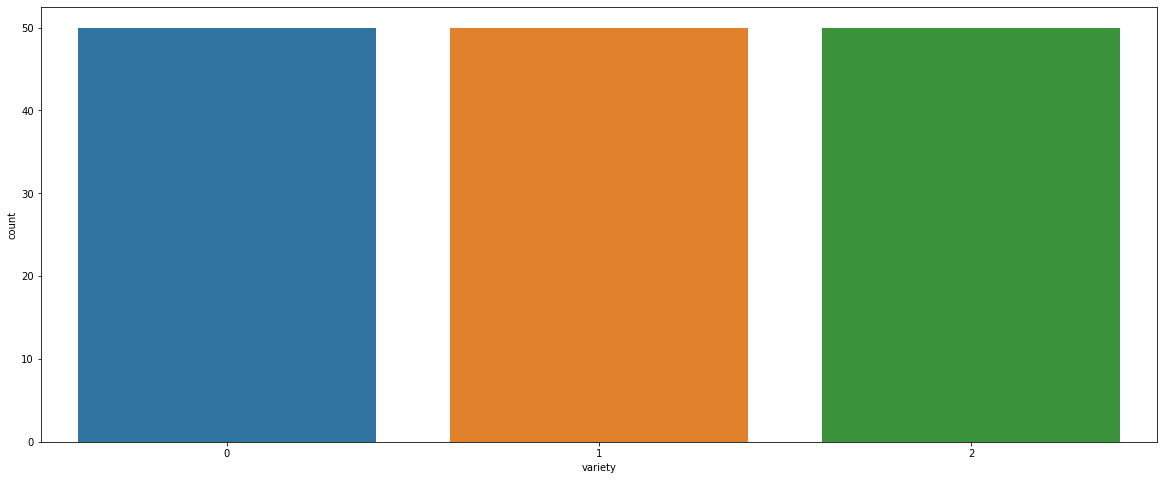

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))
sns.countplot(data['variety']);

### 4. Schritt:  Vorbereitung der Daten:

In [10]:
#Erst mal die Ausgangsgröße (roughness) als y-Werte definieren:
y_data = data.variety.values

#Jetzt Label entfernen
x_data = data.drop(["variety"],axis=1)

#Normieren der Features
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
x_norm = mm.fit_transform(x_data)

#Aufteilen in Trainings und Testdaten (70% / 30%), zufällige Auswahl
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_norm,y_data,test_size = 0.3,random_state=1)

### 5. Schritt: Modell erzeugen, trainieren und testen

In [11]:
#Entsprechendes Modul importieren
from sklearn.tree import DecisionTreeClassifier

#Modell definieren
#Parameter siehe: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
DecisionTreeClassifierModel =DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=3,min_samples_split=2,
                                    min_samples_leaf=1,min_weight_fraction_leaf=0.0,max_features=None,
                                    random_state=0, max_leaf_nodes=5)

DecisionTreeClassifierModel.fit(x_train, y_train)

#Etwas Statistik...
print('DecisionTreeClassifierModel Train Score is : ' , DecisionTreeClassifierModel.score(x_train, y_train))
print('DecisionTreeClassifierModel Test Score is : ' , DecisionTreeClassifierModel.score(x_test, y_test))

#Klassen und wichtige Features extrahieren
print('DecisionTreeClassifierModel Classes are : ' , DecisionTreeClassifierModel.classes_)
print('DecisionTreeClassifierModel feature importances are : ' , DecisionTreeClassifierModel.feature_importances_)

DecisionTreeClassifierModel Train Score is :  0.9809523809523809
DecisionTreeClassifierModel Test Score is :  0.9777777777777777
DecisionTreeClassifierModel Classes are :  [0 1 2]
DecisionTreeClassifierModel feature importances are :  [0.         0.         0.06600367 0.93399633]


### 6. Schritt: Metriken nutzen

Es gibt eine Menge nützlicher Fuktionen, um die Vorhersagegenauigkeit anzuzeigen. Hier eine ganz einfache:

In [ ]:
#Calculating Prediction
y_pred = DecisionTreeClassifierModel.predict(x_test)
# Now we calculate the probability of choosing the output for any division
y_pred_prob = DecisionTreeClassifierModel.predict_proba(x_test)
print('Predicted Value for DecisionTreeClassifierModel is : ' , y_pred[:10])
# These are the values that we categorized.
print("test values :" ,y_test[:10] )
print('Prediction Probabilities Value for DecisionTreeClassifierModel is : ' , y_pred_prob[:10])


Eine weitere Möglichkeit ist die Nutzung des "metric" Pakets:

In [ ]:
from sklearn.metrics import confusion_matrix



#Calculating Confusion Matrix
CM = confusion_matrix(y_test[:10], y_pred[:10])
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True, cmap=plt.cm.Blues, annot=True)
plt.show()

### Decission Tree visualisieren

Hierzu müssen zunächst Bibliotheken und auch das Grapviz Paket installiert werden:
https://graphviz.org/download/

Dies geht leider nur auf der eigenen Hardware, nicht im Poolraum.

In [ ]:
#pip install graphviz

In [ ]:
#pip install pydot

In [ ]:
#pip install pydotplus

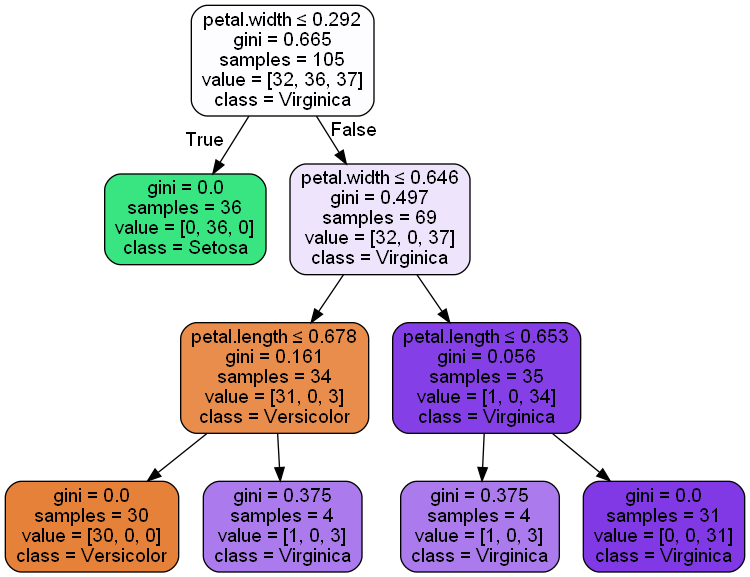

In [13]:
import io
from io import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
import graphviz


feature_cols = x_data.columns
dot_data = StringIO()
export_graphviz(DecisionTreeClassifierModel, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['Versicolor', 'Setosa', 'Virginica'])
from pydot import graph_from_dot_data
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(prog='dot'))